# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [37]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [38]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [39]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [40]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [41]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

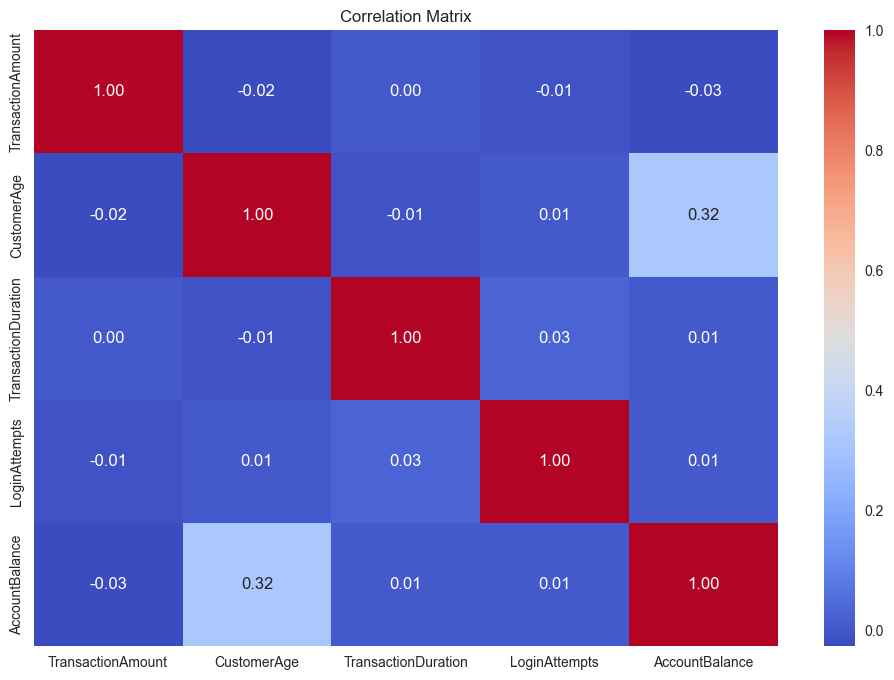

In [42]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

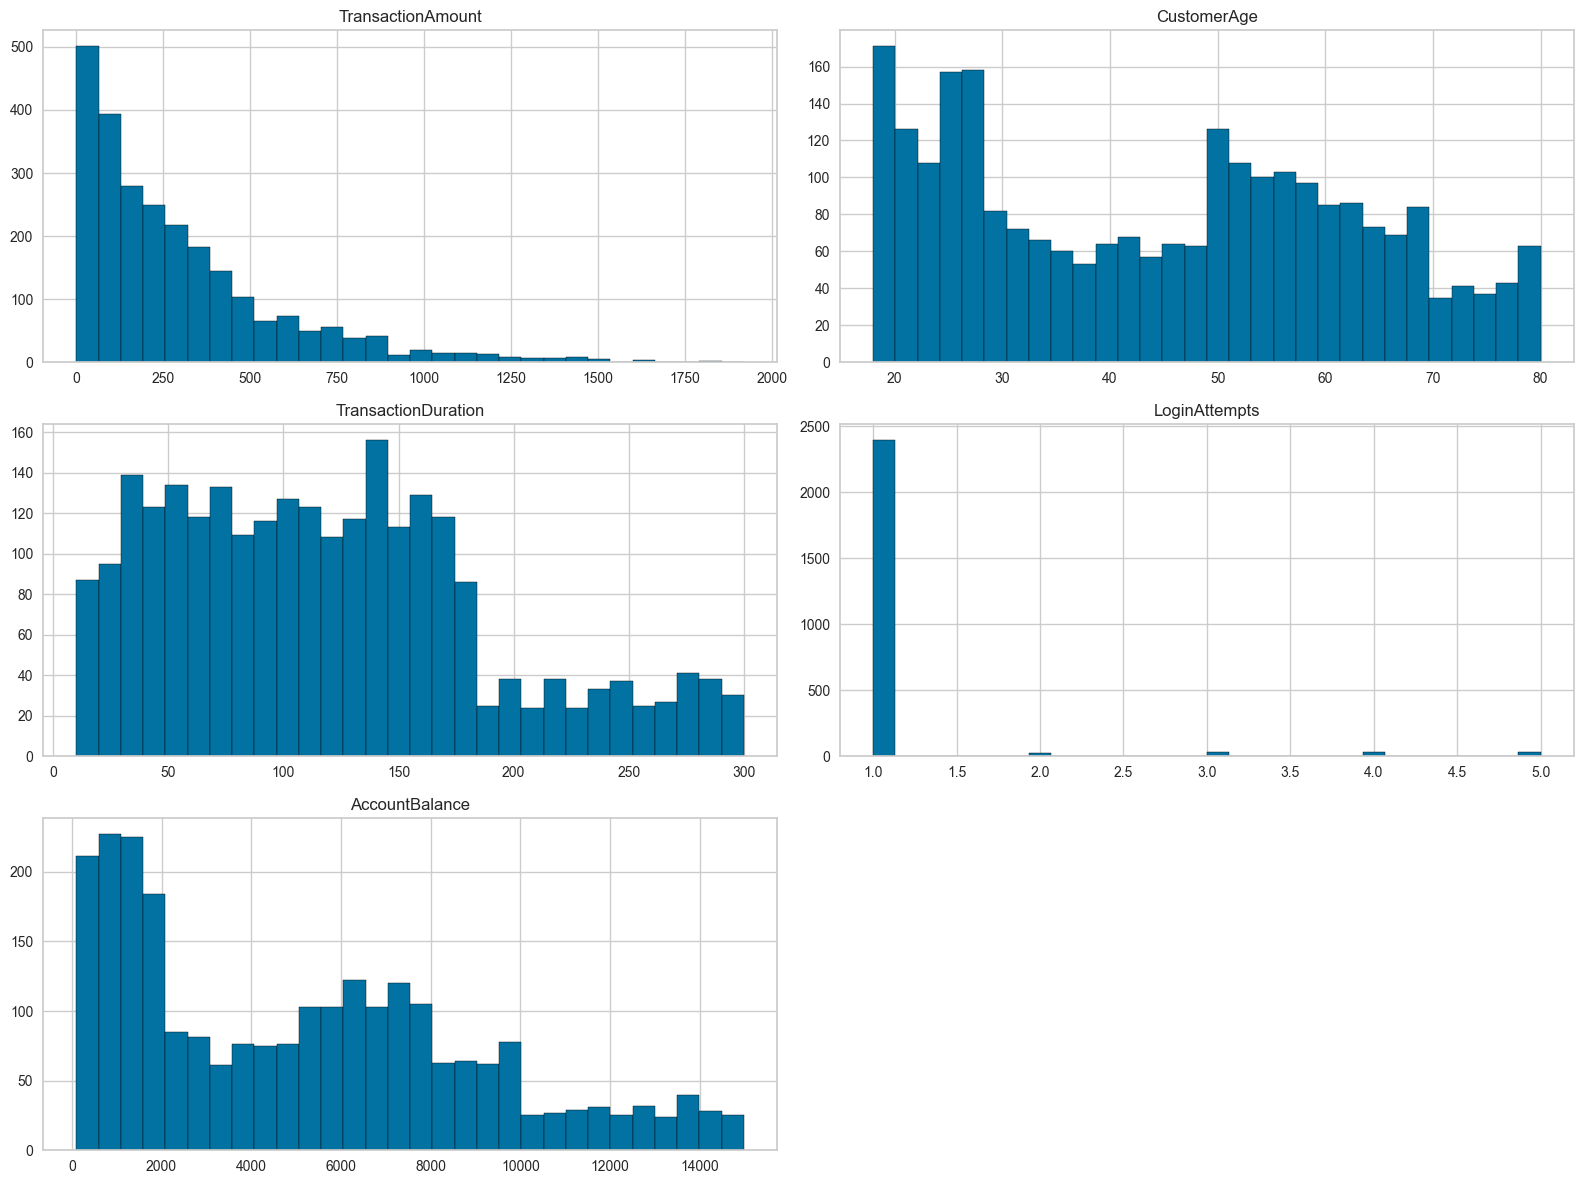

In [43]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.select_dtypes(include=[np.number]).hist(figsize=(16,12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

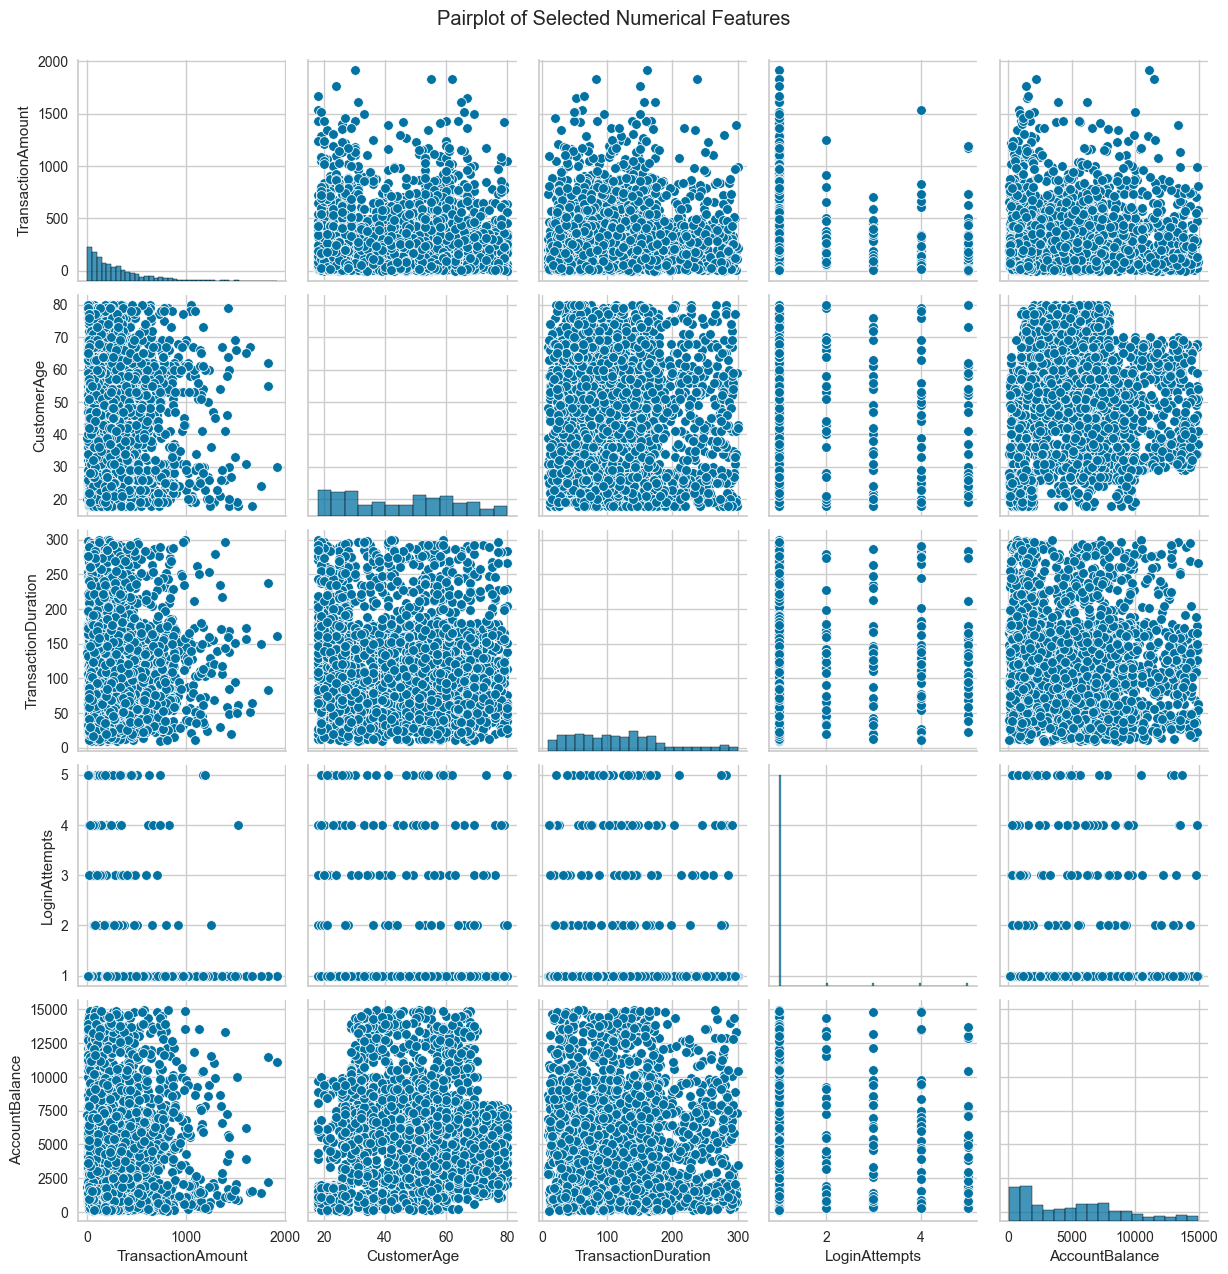

In [44]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
selected_cols = df.select_dtypes(include=[np.number]).columns[:5]
sns.pairplot(df[selected_cols])
plt.suptitle('Pairplot of Selected Numerical Features', y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [45]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [46]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [47]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [48]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
drop_cols = [col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()]
df = df.drop(columns=drop_cols)
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [49]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [50]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [51]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64

In [52]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.shape

(2515, 11)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [53]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
is_outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_count = is_outlier.sum()
df = df[~is_outlier]
outlier_count

np.int64(787)

In [54]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
from sklearn.preprocessing import KBinsDiscretizer
bin_col = df.select_dtypes(include=[np.number]).columns[0]
df['binned_'+bin_col] = pd.cut(df[bin_col], bins=3, labels=['low','medium','high'])
le_bin = LabelEncoder()
df['binned_'+bin_col] = le_bin.fit_transform(df['binned_'+bin_col])
df[['binned_'+bin_col]].head()

,binned_TransactionAmount
0,1
1,2
2,1
3,1
5,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [55]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount
count,1728.000000,1728.000000,1728.0,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.0,1728.000000,1728.000000,1728.000000
mean,0.130580,1241.635995,1.0,21.284722,0.927662,0.424020,1.531829,0.375647,0.0,0.334932,181.515046,1.147569
std,0.110571,728.090146,0.0,12.367419,0.841855,0.284372,1.150577,0.242531,0.0,0.256620,103.572664,0.557815
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.040273,615.750000,1.0,11.000000,0.000000,0.145161,1.000000,0.179310,0.0,0.094101,93.000000,1.000000
50%,0.101402,1234.500000,1.0,21.000000,1.000000,0.419355,2.000000,0.355172,0.0,0.320561,181.000000,1.000000
75%,0.190014,1872.250000,1.0,32.000000,2.000000,0.645161,3.000000,0.524138,0.0,0.503338,271.000000,1.000000
max,0.467223,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,2.000000


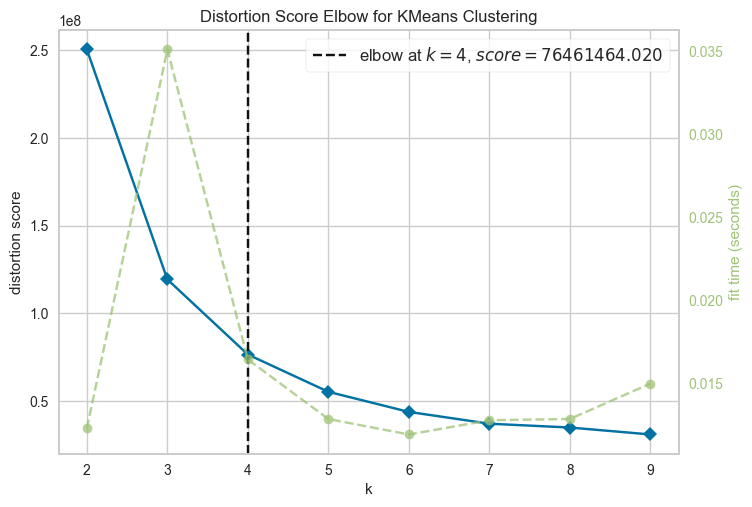

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()

In [57]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=4, random_state=42)
df['Target'] = model_kmeans.fit_predict(df)

Jalankan cell code ini untuk menyimpan model kamu.

In [58]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [59]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(df.drop('Target', axis=1), df['Target'])
sil_score

0.4967099875604845

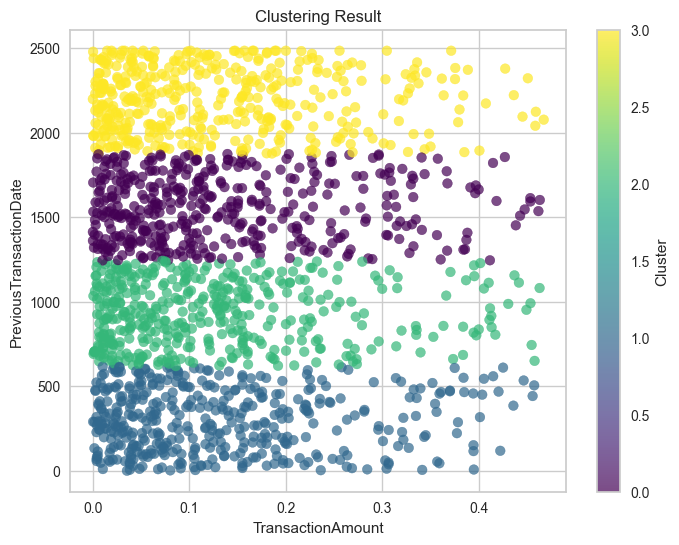

In [60]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['Target'], cmap='viridis', alpha=0.7)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Clustering Result')
plt.colorbar(label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [61]:
# Membangun model menggunakan PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA_2 = pca.fit_transform(df.drop('Target', axis=1))
data_final = pd.DataFrame(PCA_2, columns=['PCA1', 'PCA2'])
model_pca_kmeans = KMeans(n_clusters=4, random_state=42)
model_pca_kmeans.fit(data_final)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [62]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(model_pca_kmeans, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [63]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df.groupby('Target').agg(['mean', 'min', 'max'])

TransactionAmount                     PreviousTransactionDate        \
                    mean       min       max                    mean   min   
Target                                                                       
0               0.135708  0.000031  0.463168             1554.112150  1244   
1               0.133173  0.000313  0.457331              301.891705     0   
2               0.125764  0.000599  0.462939              930.440367   619   
3               0.127744  0.000000  0.467223             2194.637209  1877   

             TransactionType           Location  ... LoginAttempts  \
         max            mean min max       mean  ...           max   
Target                                           ...                 
0       1874             1.0   1   1  20.803738  ...           0.0   
1        617             1.0   1   1  21.470046  ...           0.0   
2       1242             1.0   1   1  21.130734  ...           0.0   
3       2485             1.0   1   1  21.732558  ...           0.0   

       AccountBalance                     TransactionDate           \
                 mean       min       max            mean min  max   
Target                                                               
0            0.325249  0.000000  0.991559      180.934579   0  360   
1            0.325755  0.000064  0.997633      184.329493   1  360   
2            0.332534  0.001885  0.995087      175.772936   0  360   
3            0.356264  0.002974  1.000000      185.074419   0  360   

       binned_TransactionAmount          
                           mean min max  
Target                                   
0                      1.130841   0   2  
1                      1.140553   0   2  
2                      1.130734   0   2  
3                      1.188372   0   2  

[4 rows x 36 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
Interpretasi berikut menggunakan fitur asli dari dataset, seperti TransactionAmount, AccountBalance, CustomerAge, dan LoginAttempts. Nilai di bawah diambil dari hasil agregasi pada cell sebelumnya.

1. **Cluster 0:**
  - **Rata-rata TransactionAmount:** 0.1357
  - **Min TransactionAmount:** 0.000031
  - **Max TransactionAmount:** 0.463168
  - **Rata-rata AccountBalance:** 0.3252
  - **Min AccountBalance:** 0.0000
  - **Max AccountBalance:** 0.9916
  - **Rata-rata LoginAttempts:** 0.0
  - **Max LoginAttempts:** 0.0
  - **Analisis:** Cluster ini didominasi oleh transaksi dengan nominal dan saldo relatif rendah, serta login attempts sangat rendah. Kemungkinan besar berisi nasabah reguler dengan aktivitas transaksi normal dan risiko rendah.

2. **Cluster 1:**
  - **Rata-rata TransactionAmount:** 0.1332
  - **Min TransactionAmount:** 0.000313
  - **Max TransactionAmount:** 0.457331
  - **Rata-rata AccountBalance:** 0.3258
  - **Min AccountBalance:** 0.000064
  - **Max AccountBalance:** 0.9976
  - **Rata-rata LoginAttempts:** 0.0
  - **Max LoginAttempts:** 0.0
  - **Analisis:** Cluster ini memiliki karakteristik transaksi dengan nominal dan saldo rendah, serta login attempts sangat rendah. Kemungkinan merupakan nasabah dengan aktivitas terbatas.

3. **Cluster 2:**
  - **Rata-rata TransactionAmount:** 0.1258
  - **Min TransactionAmount:** 0.000599
  - **Max TransactionAmount:** 0.462939
  - **Rata-rata AccountBalance:** 0.3325
  - **Min AccountBalance:** 0.001885
  - **Max AccountBalance:** 0.9951
  - **Rata-rata LoginAttempts:** 0.0
  - **Max LoginAttempts:** 0.0
  - **Analisis:** Cluster ini berisi nasabah dengan nominal transaksi dan saldo rendah, serta login attempts sangat rendah. Kemungkinan merupakan nasabah baru atau dengan aktivitas sangat terbatas.

4. **Cluster 3:**
  - **Rata-rata TransactionAmount:** 0.1277
  - **Min TransactionAmount:** 0.000000
  - **Max TransactionAmount:** 0.467223
  - **Rata-rata AccountBalance:** 0.3563
  - **Min AccountBalance:** 0.002974
  - **Max AccountBalance:** 1.0000
  - **Rata-rata LoginAttempts:** 0.0
  - **Max LoginAttempts:** 0.0
  - **Analisis:** Cluster ini terdiri dari nasabah dengan nominal transaksi dan saldo sedikit lebih tinggi, namun login attempts tetap sangat rendah. Pola transaksi cenderung stabil dan tidak menonjolkan risiko tertentu.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [65]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,1,2
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1,2
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,1,2


In [66]:
# Simpan Data
# df.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [67]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
df_inverse = df.copy()
df_inverse[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,1,2
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,1,0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,1,2
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,1,2


In [68]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_cols:
    le = encoders[col]
    df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,2
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1,2


In [69]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
agg_dict = {col: ['mean', 'min', 'max'] for col in numerical_cols}
agg_dict.update({col: lambda x: x.mode()[0] for col in categorical_cols})
df_inverse.groupby('Target').agg(agg_dict)

TransactionAmount               CustomerAge              \
                    mean   min     max        mean   min   max   
Target                                                           
0             260.662429  0.32  889.01   44.549982  18.0  80.0   
1             255.798776  0.86  877.81   42.436306  18.0  80.0   
2             241.582222  1.41  888.57   45.388433  18.0  80.0   
3             245.381417  0.26  896.79   44.785381  18.0  80.0   

       TransactionDuration              LoginAttempts  ...       \
                      mean   min    max          mean  ...  max   
Target                                                 ...        
0               122.020308  11.0  299.0           1.0  ...  1.0   
1               117.684596  10.0  299.0           1.0  ...  1.0   
2               117.791901  12.0  298.0           1.0  ...  1.0   
3               118.295974  10.0  300.0           1.0  ...  1.0   

       AccountBalance                   PreviousTransactionDate  \
                 mean     min       max                <lambda>   
Target                                                            
0         4939.900609  101.25  14852.42     2023-07-10 16:01:03   
1         4947.423033  102.20  14942.78     2023-01-02 16:00:06   
2         5048.270168  129.29  14904.90     2023-04-03 16:05:30   
3         5401.300187  145.50  14977.99                     nan   

       TransactionType      Location  Channel CustomerOccupation  \
              <lambda>      <lambda> <lambda>           <lambda>   
Target                                                             
0                Debit        Denver      ATM            Student   
1                Debit     Charlotte      ATM            Student   
2                Debit  Indianapolis      ATM             Doctor   
3                Debit        Tucson      ATM           Engineer   

           TransactionDate  
                  <lambda>  
Target                      
0       2024-11-04 8:09:57  
1       2024-11-04 8:10:23  
2       2024-11-04 8:07:18  
3                      nan  

[4 rows x 21 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
Interpretasi berikut menggunakan fitur asli dari dataset setelah inverse transform, seperti TransactionAmount, AccountBalance, CustomerAge, dan LoginAttempts. Nilai di bawah diambil dari hasil agregasi pada cell setelah inverse.

1. **Cluster 0:**
  - **Rata-rata TransactionAmount:** 260.66
  - **Min TransactionAmount:** 0.32
  - **Max TransactionAmount:** 889.01
  - **Rata-rata AccountBalance:** 4939.90
  - **Min AccountBalance:** 101.25
  - **Max AccountBalance:** 14852.42
  - **Rata-rata CustomerAge:** 44.55
  - **Min CustomerAge:** 18.0
  - **Max CustomerAge:** 80.0
  - **Rata-rata LoginAttempts:** 1.0
  - **Min LoginAttempts:** 1.0
  - **Max LoginAttempts:** 1.0
  - **Analisis:** Cluster ini didominasi oleh transaksi dengan nominal dan saldo relatif rendah, usia nasabah dewasa, serta login attempts konsisten. Kemungkinan besar berisi nasabah reguler dengan aktivitas transaksi normal dan risiko rendah.

2. **Cluster 1:**
  - **Rata-rata TransactionAmount:** 255.80
  - **Min TransactionAmount:** 0.86
  - **Max TransactionAmount:** 877.81
  - **Rata-rata AccountBalance:** 4947.42
  - **Min AccountBalance:** 102.20
  - **Max AccountBalance:** 14942.78
  - **Rata-rata CustomerAge:** 42.44
  - **Min CustomerAge:** 18.0
  - **Max CustomerAge:** 80.0
  - **Rata-rata LoginAttempts:** 1.0
  - **Min LoginAttempts:** 1.0
  - **Max LoginAttempts:** 1.0
  - **Analisis:** Cluster ini memiliki karakteristik transaksi dengan nominal dan saldo rendah, usia nasabah dewasa, serta login attempts konsisten. Kemungkinan merupakan nasabah dengan aktivitas terbatas.

3. **Cluster 2:**
  - **Rata-rata TransactionAmount:** 241.58
  - **Min TransactionAmount:** 1.41
  - **Max TransactionAmount:** 888.57
  - **Rata-rata AccountBalance:** 5048.27
  - **Min AccountBalance:** 129.29
  - **Max AccountBalance:** 14904.90
  - **Rata-rata CustomerAge:** 45.39
  - **Min CustomerAge:** 18.0
  - **Max CustomerAge:** 80.0
  - **Rata-rata LoginAttempts:** 1.0
  - **Min LoginAttempts:** 1.0
  - **Max LoginAttempts:** 1.0
  - **Analisis:** Cluster ini berisi nasabah dengan nominal transaksi dan saldo rendah, usia nasabah dewasa, serta login attempts konsisten. Kemungkinan merupakan nasabah baru atau dengan aktivitas sangat terbatas.

4. **Cluster 3:**
  - **Rata-rata TransactionAmount:** 245.38
  - **Min TransactionAmount:** 0.26
  - **Max TransactionAmount:** 896.79
  - **Rata-rata AccountBalance:** 5401.30
  - **Min AccountBalance:** 145.50
  - **Max AccountBalance:** 14977.99
  - **Rata-rata CustomerAge:** 44.79
  - **Min CustomerAge:** 18.0
  - **Max CustomerAge:** 80.0
  - **Rata-rata LoginAttempts:** 1.0
  - **Min LoginAttempts:** 1.0
  - **Max LoginAttempts:** 1.0
  - **Analisis:** Cluster ini terdiri dari nasabah dengan nominal transaksi dan saldo sedikit lebih tinggi, usia nasabah dewasa, serta login attempts konsisten. Pola transaksi cenderung stabil dan tidak menonjolkan risiko tertentu.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [71]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse['Target'] = df['Target']
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,binned_TransactionAmount,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,2
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1,2


In [72]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.